In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
pip install -r ../requirements.txt

Defaulting to user installation because normal site-packages is not writeable
ERROR: Ignored the following versions that require a different python version: 3.5 Requires-Python >=3.11; 3.5rc0 Requires-Python >=3.11; 3.6 Requires-Python >=3.11; 3.6rc0 Requires-Python >=3.11
ERROR: Could not find a version that satisfies the requirement networkx==3.5 (from versions: 0.34, 0.35, 0.35.1, 0.36, 0.37, 0.99, 1.0rc1, 1.0, 1.0.1, 1.1, 1.2rc1, 1.2, 1.3rc1, 1.3, 1.4rc1, 1.4, 1.5rc1, 1.5, 1.6rc1, 1.6, 1.7rc1, 1.7, 1.8rc1, 1.8, 1.8.1, 1.9rc1, 1.9, 1.9.1, 1.10rc2, 1.10, 1.11rc1, 1.11rc2, 1.11, 2.0, 2.1, 2.2rc1, 2.2, 2.3rc3, 2.3rc4, 2.3, 2.4rc1, 2.4rc2, 2.4, 2.5rc1, 2.5, 2.5.1, 2.6rc1, 2.6rc2, 2.6, 2.6.1, 2.6.2, 2.6.3, 2.7rc1, 2.7, 2.7.1, 2.8rc1, 2.8, 2.8.1rc1, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.8.5, 2.8.6, 2.8.7, 2.8.8, 3.0b1, 3.0rc1, 3.0, 3.1rc0, 3.1, 3.2rc0, 3.2, 3.2.1, 3.3rc0, 3.3, 3.4rc0, 3.4, 3.4.1, 3.4.2)
ERROR: No matching distribution found for networkx==3.5
Note: you may need to restart the kern

In [2]:
import cv2
print(cv2.__version__)

4.12.0


In [ ]:
pip install numpy==1.26.4 --force-reinstall

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import scipy as sp
print(sp.__version__)

1.12.0


In [2]:
import sys
import os
PROJECT_ROOT = os.path.abspath("..")  # adjust if needed
if PROJECT_ROOT not in sys.path:
    sys.path.insert(0, PROJECT_ROOT)
from scripts.trainer import ChestXrayHandler
import yaml
import os
import pandas as pd

/usr/local/pace-apps/manual/packages/anaconda3/2023.03/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
def fix_path(p, config_path="../configs/config_HCV.yaml"):
    if p is None:
        return None
    if isinstance(p, str) and not os.path.isabs(p):
        base = os.path.dirname(os.path.abspath(config_path))
        return os.path.abspath(os.path.join(base, p))
    return p

In [4]:
with open("../configs/config_HCV.yaml", "r") as f:
    raw_cfg = yaml.safe_load(f)
raw_cfg

{'test_model': {'value': False,
  'help': 'true to test the model, false to train'},
 'epochs': {'value': 25, 'help': 'Number of epochs to train.'},
 'batch_size': {'value': 16, 'help': 'Batch size for training.'},
 'lr': {'value': 0.0001, 'help': 'Learning rate.'},
 'lr_decay': {'value': 0.1, 'help': 'Gamma value for StepLR scheduler.'},
 'workers': {'value': 4, 'help': 'Number of dataloader workers.'},
 'device': {'value': 'auto', 'help': 'Training device: auto/cpu/cuda/mps.'},
 'freeze_backbone': {'value': True, 'help': 'Freeze DenseNet backbone.'},
 'freeze_vit': {'value': False, 'help': 'Freeze ViT encoder.'},
 'train_last_vit_layers': {'value': 0,
  'help': 'Train only the last N transformer layers in ViT.'},
 'use_custom_proj': {'value': True,
  'help': 'Use custom DenseNet→ViT projection block.'},
 'custom_proj_layers': {'value': 256,
  'help': 'The number of layers in the custom projection'},
 'img_dir': {'value': '../nih_data', 'help': 'Directory of image folders.'},
 'csv_pa

In [5]:
class Dict2Obj:
    def __init__(self, d):
        for key, item in d.items():
            # YAML format: key: {value: X, help: Y}
            if isinstance(item, dict) and "value" in item:
                setattr(self, key, item["value"])
            else:
                setattr(self, key, item)
args = Dict2Obj(raw_cfg)

args.img_dir  = fix_path(args.img_dir)
args.csv_path = fix_path(args.csv_path)
args.save_dir = fix_path(args.save_dir)
if args.resume:
    args.resume = fix_path(args.resume)

# prevent deadlocks
args.workers = 2

# override training hyperparameters - If you want to change them only in the config, comment this out!
#args.epochs = 3
#args.batch_size = 8
#args.lr = 0.0001
#args.verbose = True
# disable resume
#args.resume = None


In [16]:
import numpy as np
print(np.asarray)

<built-in function asarray>


In [6]:
trainer = ChestXrayHandler(args)

Device: cuda, Rank: 0, DDP: False
14438      patient23864/study2/view1_frontal.jpg
293316                          00010481_016.png
223453     patient36779/study5/view1_frontal.jpg
110405                          00000533_003.png
308347     patient57942/study1/view1_frontal.jpg
83498      patient09076/study9/view1_frontal.jpg
282639     patient37458/study4/view1_frontal.jpg
254930                          00022493_001.png
189047     patient61786/study1/view1_frontal.jpg
262626    patient35957/study23/view1_frontal.jpg
Name: Image Index, dtype: object


In [7]:
trainer.run()

Epoch 1 Training: 100%|██████████| 11754/11754 [36:43<00:00,  5.33it/s, loss=0.0628] 


Train Loss: 0.0598 | Train Acc: 0.9067


Epoch 1 Validation: 100%|██████████| 3918/3918 [11:09<00:00,  5.85it/s]


Val Loss=0.0566 | Val Acc=0.9110 | Macro F1=0.3029
Saved BEST model → Macro F1: 0.3029


Epoch 2 Training: 100%|██████████| 11754/11754 [15:23<00:00, 12.73it/s, loss=0.0538]


Train Loss: 0.0564 | Train Acc: 0.9109


Epoch 2 Validation: 100%|██████████| 3918/3918 [05:02<00:00, 12.94it/s]


Val Loss=0.0554 | Val Acc=0.9124 | Macro F1=0.3164
Saved BEST model → Macro F1: 0.3164


Epoch 3 Training: 100%|██████████| 11754/11754 [15:36<00:00, 12.54it/s, loss=0.0502]


Train Loss: 0.0554 | Train Acc: 0.9121


Epoch 3 Validation: 100%|██████████| 3918/3918 [05:08<00:00, 12.72it/s]


Val Loss=0.0549 | Val Acc=0.9128 | Macro F1=0.3256
Saved BEST model → Macro F1: 0.3256


Epoch 4 Training: 100%|██████████| 11754/11754 [15:46<00:00, 12.42it/s, loss=0.0467]


Train Loss: 0.0548 | Train Acc: 0.9130


Epoch 4 Validation: 100%|██████████| 3918/3918 [05:09<00:00, 12.68it/s]


Val Loss=0.0541 | Val Acc=0.9135 | Macro F1=0.3330
Saved BEST model → Macro F1: 0.3330


Epoch 5 Training: 100%|██████████| 11754/11754 [15:52<00:00, 12.34it/s, loss=0.066] 


Train Loss: 0.0543 | Train Acc: 0.9135


Epoch 5 Validation: 100%|██████████| 3918/3918 [05:10<00:00, 12.61it/s]


Val Loss=0.0543 | Val Acc=0.9135 | Macro F1=0.3348
Saved BEST model → Macro F1: 0.3348


Epoch 6 Training: 100%|██████████| 11754/11754 [15:48<00:00, 12.39it/s, loss=0.047] 


Train Loss: 0.0539 | Train Acc: 0.9139


Epoch 6 Validation: 100%|██████████| 3918/3918 [05:08<00:00, 12.71it/s]


Val Loss=0.0538 | Val Acc=0.9142 | Macro F1=0.3413
Saved BEST model → Macro F1: 0.3413


Epoch 7 Training: 100%|██████████| 11754/11754 [15:47<00:00, 12.41it/s, loss=0.0693]


Train Loss: 0.0538 | Train Acc: 0.9142


Epoch 7 Validation: 100%|██████████| 3918/3918 [05:08<00:00, 12.70it/s]


Val Loss=0.0537 | Val Acc=0.9145 | Macro F1=0.3421
Saved BEST model → Macro F1: 0.3421


Epoch 8 Training: 100%|██████████| 11754/11754 [15:45<00:00, 12.43it/s, loss=0.0611]


Train Loss: 0.0535 | Train Acc: 0.9145


Epoch 8 Validation: 100%|██████████| 3918/3918 [05:06<00:00, 12.76it/s]


Val Loss=0.0538 | Val Acc=0.9142 | Macro F1=0.3443
Saved BEST model → Macro F1: 0.3443


Epoch 9 Training: 100%|██████████| 11754/11754 [15:37<00:00, 12.54it/s, loss=0.0564]


Train Loss: 0.0533 | Train Acc: 0.9147


Epoch 9 Validation: 100%|██████████| 3918/3918 [05:11<00:00, 12.59it/s]


Val Loss=0.0534 | Val Acc=0.9148 | Macro F1=0.3464
Saved BEST model → Macro F1: 0.3464


Epoch 10 Training: 100%|██████████| 11754/11754 [16:03<00:00, 12.20it/s, loss=0.049] 


Train Loss: 0.0531 | Train Acc: 0.9150


Epoch 10 Validation: 100%|██████████| 3918/3918 [05:04<00:00, 12.89it/s]


Val Loss=0.0534 | Val Acc=0.9149 | Macro F1=0.3507
Saved BEST model → Macro F1: 0.3507


Epoch 11 Training: 100%|██████████| 11754/11754 [16:11<00:00, 12.10it/s, loss=0.0426]


Train Loss: 0.0522 | Train Acc: 0.9162


Epoch 11 Validation: 100%|██████████| 3918/3918 [05:12<00:00, 12.56it/s]


Val Loss=0.0528 | Val Acc=0.9153 | Macro F1=0.3550
Saved BEST model → Macro F1: 0.3550


Epoch 12 Training: 100%|██████████| 11754/11754 [16:13<00:00, 12.08it/s, loss=0.0554]


Train Loss: 0.0520 | Train Acc: 0.9163


Epoch 12 Validation: 100%|██████████| 3918/3918 [05:14<00:00, 12.46it/s]


Val Loss=0.0527 | Val Acc=0.9158 | Macro F1=0.3561
Saved BEST model → Macro F1: 0.3561


Epoch 13 Training: 100%|██████████| 11754/11754 [15:48<00:00, 12.40it/s, loss=0.0638]


Train Loss: 0.0519 | Train Acc: 0.9164


Epoch 13 Validation: 100%|██████████| 3918/3918 [05:07<00:00, 12.76it/s]


Val Loss=0.0526 | Val Acc=0.9158 | Macro F1=0.3592
Saved BEST model → Macro F1: 0.3592


Epoch 14 Training: 100%|██████████| 11754/11754 [15:42<00:00, 12.47it/s, loss=0.0433]


Train Loss: 0.0518 | Train Acc: 0.9165


Epoch 14 Validation: 100%|██████████| 3918/3918 [05:09<00:00, 12.66it/s]


Val Loss=0.0526 | Val Acc=0.9159 | Macro F1=0.3590


Epoch 15 Training: 100%|██████████| 11754/11754 [15:50<00:00, 12.36it/s, loss=0.0559]


Train Loss: 0.0517 | Train Acc: 0.9167


Epoch 15 Validation: 100%|██████████| 3918/3918 [05:04<00:00, 12.88it/s]


Val Loss=0.0526 | Val Acc=0.9159 | Macro F1=0.3595
Saved BEST model → Macro F1: 0.3595


Epoch 16 Training: 100%|██████████| 11754/11754 [15:33<00:00, 12.59it/s, loss=0.059] 


Train Loss: 0.0517 | Train Acc: 0.9167


Epoch 16 Validation: 100%|██████████| 3918/3918 [05:08<00:00, 12.69it/s]


Val Loss=0.0525 | Val Acc=0.9159 | Macro F1=0.3615
Saved BEST model → Macro F1: 0.3615


Epoch 17 Training: 100%|██████████| 11754/11754 [15:45<00:00, 12.43it/s, loss=0.0471]


Train Loss: 0.0516 | Train Acc: 0.9168


Epoch 17 Validation: 100%|██████████| 3918/3918 [05:12<00:00, 12.54it/s]


Val Loss=0.0526 | Val Acc=0.9156 | Macro F1=0.3619
Saved BEST model → Macro F1: 0.3619


Epoch 18 Training: 100%|██████████| 11754/11754 [16:10<00:00, 12.11it/s, loss=0.0514]


Train Loss: 0.0515 | Train Acc: 0.9169


Epoch 18 Validation: 100%|██████████| 3918/3918 [05:17<00:00, 12.34it/s]


Val Loss=0.0525 | Val Acc=0.9158 | Macro F1=0.3594


Epoch 19 Training: 100%|██████████| 11754/11754 [16:07<00:00, 12.15it/s, loss=0.0418]


Train Loss: 0.0515 | Train Acc: 0.9169


Epoch 19 Validation: 100%|██████████| 3918/3918 [05:16<00:00, 12.38it/s]


Val Loss=0.0524 | Val Acc=0.9160 | Macro F1=0.3605


Epoch 20 Training: 100%|██████████| 11754/11754 [15:52<00:00, 12.34it/s, loss=0.0364]


Train Loss: 0.0514 | Train Acc: 0.9171


Epoch 20 Validation: 100%|██████████| 3918/3918 [05:10<00:00, 12.63it/s]


Val Loss=0.0525 | Val Acc=0.9160 | Macro F1=0.3592


Epoch 21 Training: 100%|██████████| 11754/11754 [16:06<00:00, 12.16it/s, loss=0.0454]


Train Loss: 0.0512 | Train Acc: 0.9172


Epoch 21 Validation: 100%|██████████| 3918/3918 [05:09<00:00, 12.65it/s]


Val Loss=0.0524 | Val Acc=0.9159 | Macro F1=0.3611


Epoch 22 Training: 100%|██████████| 11754/11754 [16:14<00:00, 12.06it/s, loss=0.0719]


Train Loss: 0.0512 | Train Acc: 0.9172


Epoch 22 Validation: 100%|██████████| 3918/3918 [05:11<00:00, 12.56it/s]


Val Loss=0.0524 | Val Acc=0.9161 | Macro F1=0.3605


Epoch 23 Training: 100%|██████████| 11754/11754 [16:55<00:00, 11.57it/s, loss=0.0491]


Train Loss: 0.0512 | Train Acc: 0.9172


Epoch 23 Validation: 100%|██████████| 3918/3918 [05:05<00:00, 12.81it/s]


Val Loss=0.0524 | Val Acc=0.9161 | Macro F1=0.3600


Epoch 24 Training: 100%|██████████| 11754/11754 [16:24<00:00, 11.94it/s, loss=0.0544]


Train Loss: 0.0512 | Train Acc: 0.9172


Epoch 24 Validation: 100%|██████████| 3918/3918 [05:08<00:00, 12.70it/s]


Val Loss=0.0524 | Val Acc=0.9160 | Macro F1=0.3581


Epoch 25 Training: 100%|██████████| 11754/11754 [18:50<00:00, 10.40it/s, loss=0.0479]


Train Loss: 0.0512 | Train Acc: 0.9172


Epoch 25 Validation: 100%|██████████| 3918/3918 [05:54<00:00, 11.05it/s]


Val Loss=0.0524 | Val Acc=0.9162 | Macro F1=0.3609


In [8]:
result_3 = pd.read_csv("../results/training_results.csv")
result_3

,epoch,train_loss,train_acc,val_loss,val_acc,val_macro_f1
0,1,0.059770,0.906711,0.056562,0.911007,0.302869
1,2,0.056357,0.910877,0.055373,0.912438,0.316355
2,3,0.055371,0.912145,0.054871,0.912848,0.325640
3,4,0.054751,0.912960,0.054123,0.913466,0.333043
4,5,0.054281,0.913529,0.054295,0.913534,0.334787
5,6,0.053929,0.913904,0.053781,0.914230,0.341274
6,7,0.053762,0.914176,0.053702,0.914457,0.342068
7,8,0.053520,0.914513,0.053802,0.914186,0.344278
8,9,0.053309,0.914667,0.053399,0.914799,0.346399
9,10,0.053076,0.914981,0.053355,0.914905,0.350729


In [9]:
trainer.test()


Running FINAL TEST evaluation...


Testing: 100%|██████████| 3918/3918 [11:21<00:00,  5.75it/s]



Test Loss: 0.0527 | Test Accuracy: 0.8716 | Macro F1: 0.3576


In [10]:
# check the result
result_1 = pd.read_csv("../results/final_test_per_class.csv")
result_1

,Disease,F1,AUC
0,Atelectasis,0.521324,0.747628
1,Cardiomegaly,0.476501,0.843709
2,Consolidation,0.381256,0.739158
3,Edema,0.634016,0.880468
4,Effusion,0.718976,0.862271
5,Emphysema,0.324094,0.954396
6,Fibrosis,0.111043,0.924932
7,Hernia,0.082988,0.938142
8,Infiltration,0.397889,0.903863
9,Mass,0.271103,0.920007


In [11]:
result_2 = pd.read_csv("../results/final_test_summary.csv")
result_2

,metric,value
0,test_loss,0.052691
1,test_accuracy,0.871620
2,macro_f1,0.357591


In [ ]:
#### later we can create some plots. give more analysis.

In [22]:
!python generate_attnmaps.py

Traceback (most recent call last):
  File "/storage/ice1/9/8/royerinde3/scripts/generate_attnmaps.py", line 9, in <module>
    trainer = ChestXrayHandler(args)
NameError: name 'args' is not defined


Loading checkpoint from ../checkpoints/best_checkpoint.pth
  Reason: 'optimizer_state'
  Reason: 'scheduler_state'
Checkpoint loaded. Resuming from epoch 18.
../chexpert_data/train
Num blocks: 12
Shape block 11: torch.Size([1, 12, 50, 50])
batch_idx: 0


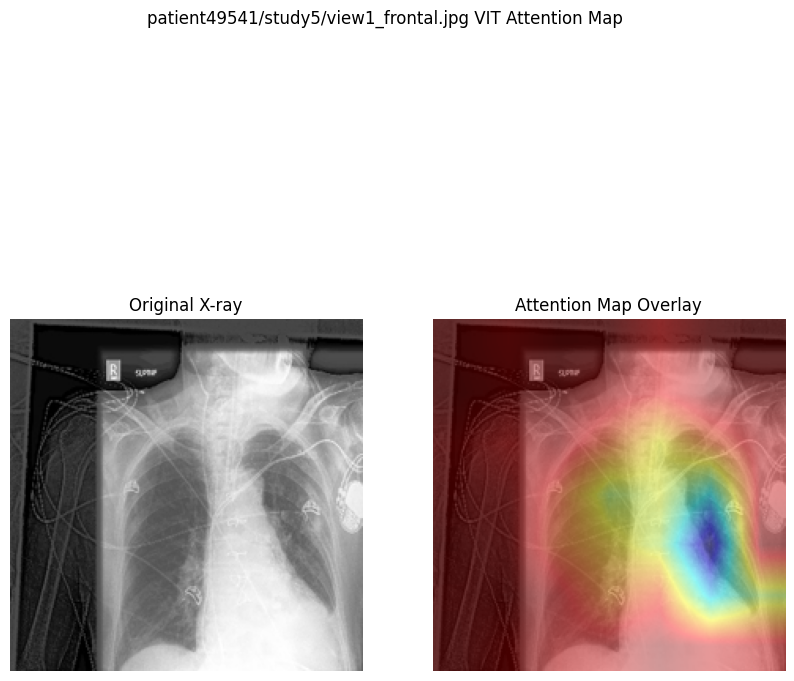

Saved attention map to ../results


In [8]:
trainer.build_transforms()
trainer.build_model()
trainer.load_checkpoint("../checkpoints/best_checkpoint.pth")

test_image = "patient49541/study5/view1_frontal.jpg"
trainer.generate_vit_map(batch= None,img_name = test_image, batch_index = 0, save_dir = "../results")